<a href="https://colab.research.google.com/github/aldrenjunior/exploring-Covid-19-data-in-municipalities/blob/main/Desafio05_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Explorando dados tabulares com Pandas

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

Function

In [2]:
def plotAll(df, msk, titles, x='date', y='value', ylim=False):
  """
    Build a gridspec plot with three plots in the same figure
    ...
    Parameters:
    -----------
    df: DataFrame
      A dataframe with the data that we'll plot
    msk: DataFrame
      Boolean mask, will filter the dataframe
    titles: list
      Plot's titles list
    x: String
      Value for x axis
    y: String
      VAlue for y axis
    ylim: Boolean
      Change the ylim for one plot
  """
  # Building plot
  fig = plt.figure(constrained_layout=True, figsize=(25, 8))
  grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

  # Creating subplots
  ax1 = fig.add_subplot(grid[0, 0])
  ax2 = fig.add_subplot(grid[0:, 1])
  ax3 = fig.add_subplot(grid[1, 0])
  # Create twin
  ax2Twin = ax2.twinx()

  # Plot data
  sns.lineplot(data=df[msk], x=x, y=y, color='blue', ax=ax1)
  sns.lineplot(data=df[~msk], x=x, y=y, color='red', ax=ax3)
  sns.lineplot(data=df[msk], x=x, y=y, color='blue', ax=ax2)
  sns.lineplot(data=df[~msk], x=x, y=y, color='red', ax=ax2Twin)

  # Aesthetics
  # Set x label and title
  for ax, ttl in zip([ax1, ax2, ax3], titles):
    ax.set_xlabel('Data')
    ax.set_title(ttl)

  # Set y label for plot 1 and 3
  for ax in [ax1, ax3]:
    ax.set_ylabel('Quantidade')

  # set y label for plot 2 and twin
  ax2.set_ylabel("Quantidade", color='blue')
  ax2Twin.set_ylabel("Quantidade", color='red')
  # Align axis
  if ylim:
    ax2.set_ylim(-190, 2500)

  # Legend
  fig.legend(title = 'Categoria', handles=[Line2D([0], [0], color='blue', lw=4, label='Confirmados'), 
                      Line2D([0], [0], color='red', lw=4, label='Mortes')], loc='center', bbox_to_anchor=(0.56, 0.86))

  plt.show()

## Covid-19 nos municípios
O arquivo `caso_full.csv` (https://data.brasil.io/dataset/covid19/caso_full.csv.gz) contem informação sobre casos e mortes por Covid-19 para municipios do Brasil<sup>1</sup>.  
A descrição das colunas da tabela está disponível em: https://github.com/turicas/covid19-br/blob/master/api.md#caso_full
  
(1) Fonte: https://brasil.io/ <br>

### Carregando os dados
>**1. Importe os dados como dataframe (`pd.read_csv`), declarando a coluna 'city' como index dele**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#importar os dados
path = '/content/drive/MyDrive/Aprendizado de Maquinas para Ciências da Vida/data/caso_full.csv'
dataRaw = pd.read_csv(path)
dataRaw.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [5]:
# Correção do campo date para o formato 'datetime'
dataRaw.date = pd.to_datetime(dataRaw.date, format='%Y-%m-%d')

Escolha um município de interesse (tem que escrever exatamente como aparece na tabela). Infelizmente os dados para Natal não estão sendo bem atualizados nessa tabela em 2021.

In [6]:
cidade = 'Parnamirim'

>**2. Quantas linhas tem para a cidade escolhida?**

*Como a gente fez de 'city' o index, você tem que ver quantas linhas tem esse nome no index*.

In [7]:
mask = dataRaw.city == cidade
shapeTuple = dataRaw[mask].shape
print(f'Linhas: {shapeTuple[0]}\nColunas: {shapeTuple[1]}')

Linhas: 634
Colunas: 18


Esta é mais difícil:
>**3. Para quantas cidades diferentes do RN existem dados na tabela?**


*Voce precisa seleccionar todas as linhas que tenham 'RN' na coluna 'state' e ver quantos valores **diferentes** tem no index. Veja como usar o método `unique()` para resolver isso.*

In [8]:
#rn = data.loc[(data['state'] == 'RN') & (data['place_type'] == 'city')].index.unique()
mask = (dataRaw.state == 'RN') & (dataRaw.place_type == 'city')
citiesList = dataRaw[mask].city.unique()
print(f'Há registro de {len(citiesList)} diferentes.')

Há registro de 168 diferentes.


>**4. Explore gráficamente:**
- A evolução dia por dia do número de casos e mortes **novas** por Covid-19 no município
- A evolução dia por dia do número de casos e mortes **totais** por Covid-19 no município
</ul>
<i>Como, afortunadamente, os número de mortes são muito menores do que o número de casos, fica difícil entender as duas curvas na mesma escala. De repente explore a possibilidade de <a href=https://matplotlib.org/3.2.1/gallery/subplots_axes_and_figures/two_scales.html>usar duas escalas diferentes no mesmo axes</a>.</i>

In [9]:
# importe seu module de gráficos favorito
mask = dataRaw.city == cidade
dataNatal = dataRaw[mask].copy()

#### A evolução dia por dia do número de casos e mortes novas por Covid-19 no município

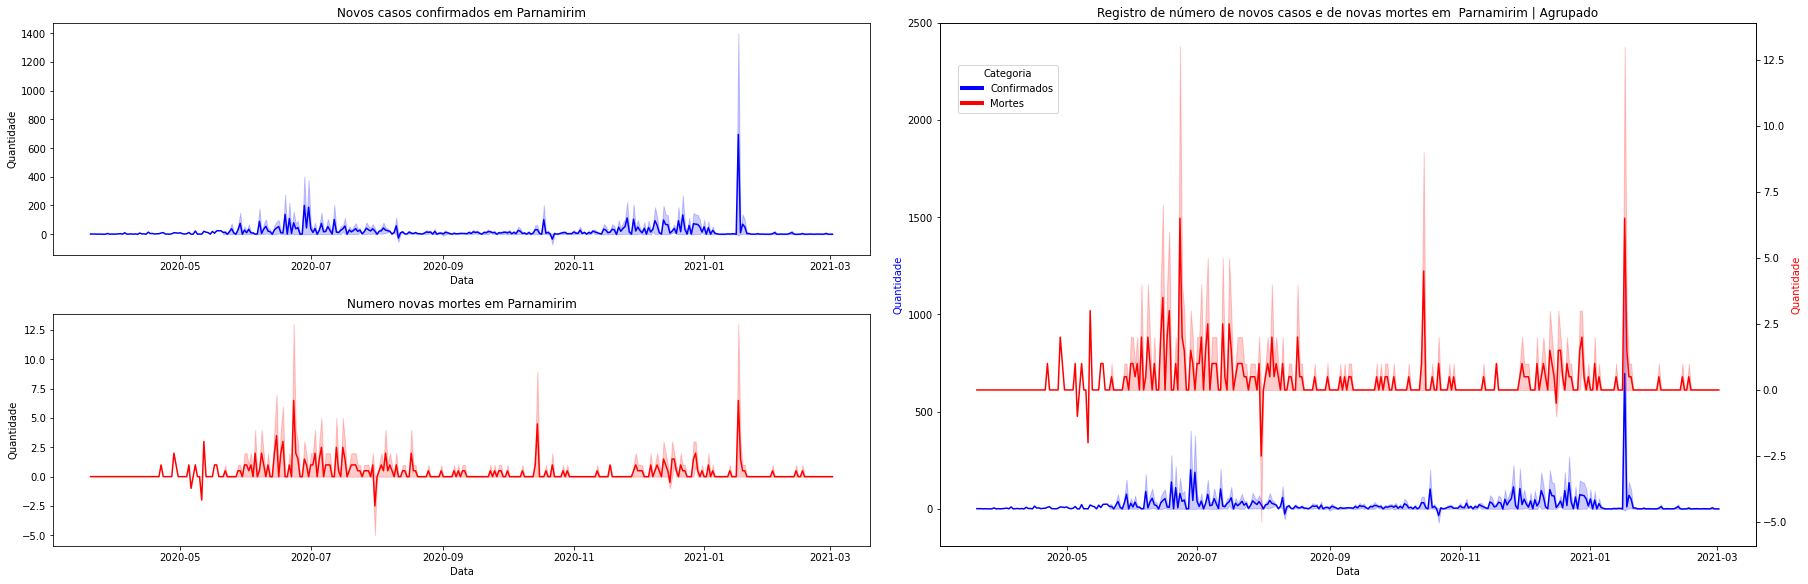

In [10]:
# Choosing taget data
tempDf = dataNatal[['date', 'new_confirmed', 'new_deaths']]
tempDf = tempDf.melt(id_vars='date', value_vars=['new_confirmed', 'new_deaths'])
mask = tempDf.variable == 'new_confirmed'
# Plot
titles = [f'Novos casos confirmados em {cidade}', f'Registro de número de novos casos e de novas mortes em  {cidade} | Agrupado', f'Numero novas mortes em {cidade}']
plotAll(tempDf, mask, titles, x='date', y='value', ylim=True)

####A evolução dia por dia do número de casos e mortes totais por Covid-19 no município

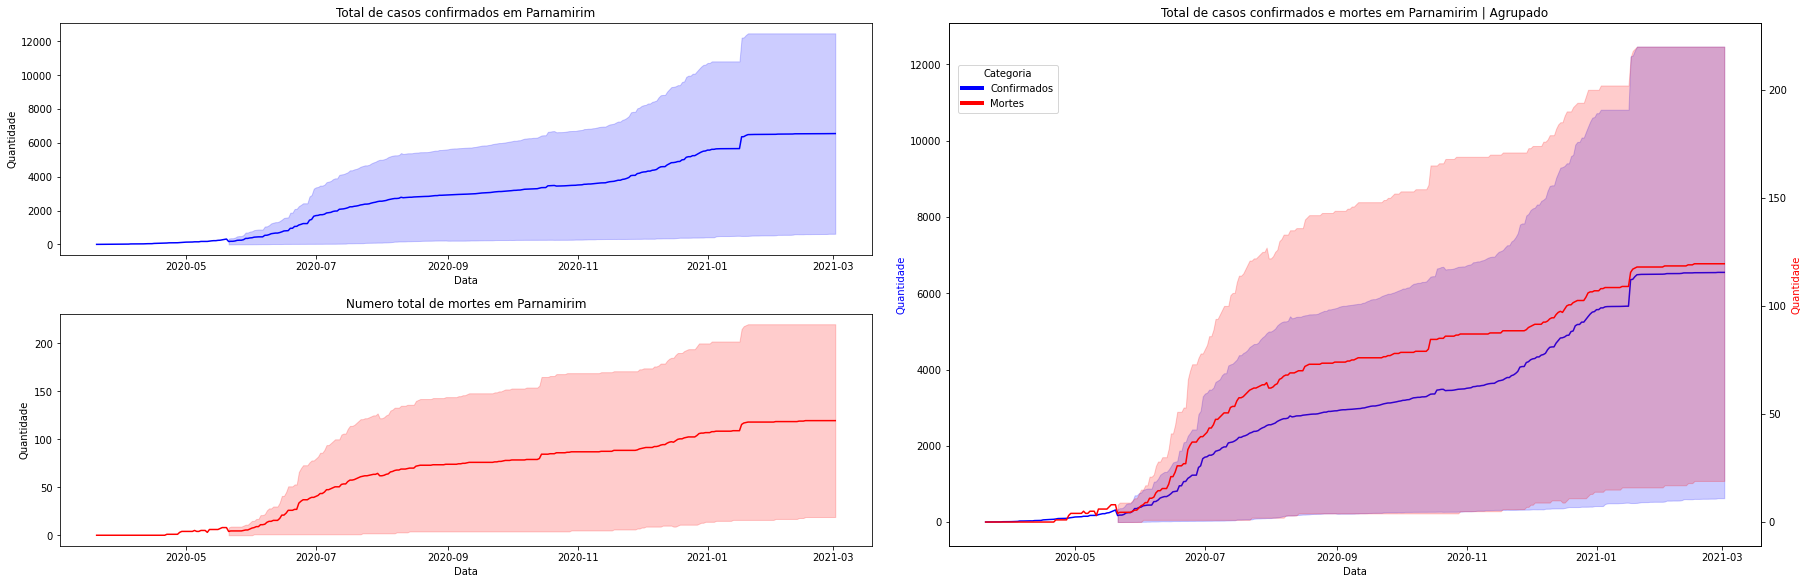

In [11]:
# Choosing taget data
tempDf = dataNatal[['date', 'last_available_confirmed', 'last_available_deaths']]
tempDf = tempDf.melt(id_vars='date', value_vars=['last_available_confirmed', 'last_available_deaths'])
mask = tempDf.variable == 'last_available_confirmed'
# Plot
titles = [f'Total de casos confirmados em {cidade}', f'Total de casos confirmados e mortes em {cidade} | Agrupado', f'Numero total de mortes em {cidade}']
plotAll(tempDf, mask, titles, x='date', y='value')

As séries de casos e mortes novas por dia é muito ruidosa, vamos ver isso por semana melhor?
>**5. Use aggregation para obter as médias de casos e mortes novas para cada semana epidemiológica (`groupby()`, `mean()`) e plote elas.**  

*Note que a semana epidemiologica está anotada como um número que junta ano e número de semana dentro do ano (tipo 202012 ou 202102). Eu acharia melhor chamar elas 1, 2, 3... contando desde a primera semana que teve um caso confirmado. Consegue fazer?*

In [12]:
# Select data and calculate mean
# tempDf = dataNatal.groupby(['epidemiological_week'])[['new_confirmed', 'new_deaths']].mean().reset_index(drop=True)
tempDf = dataNatal.groupby(['epidemiological_week'])[['new_confirmed', 'new_deaths']].agg('mean').reset_index(drop=True)
# Create week order
tempDf['week'] = range(1, len(tempDf)+1)
# Melt to plot
tempDf = tempDf.melt(id_vars='week', value_vars=['new_confirmed', 'new_deaths'])
tempDf.head()

,week,variable,value
0,1,new_confirmed,1.000000
1,2,new_confirmed,1.000000
2,3,new_confirmed,1.142857
3,4,new_confirmed,2.000000
4,5,new_confirmed,5.000000


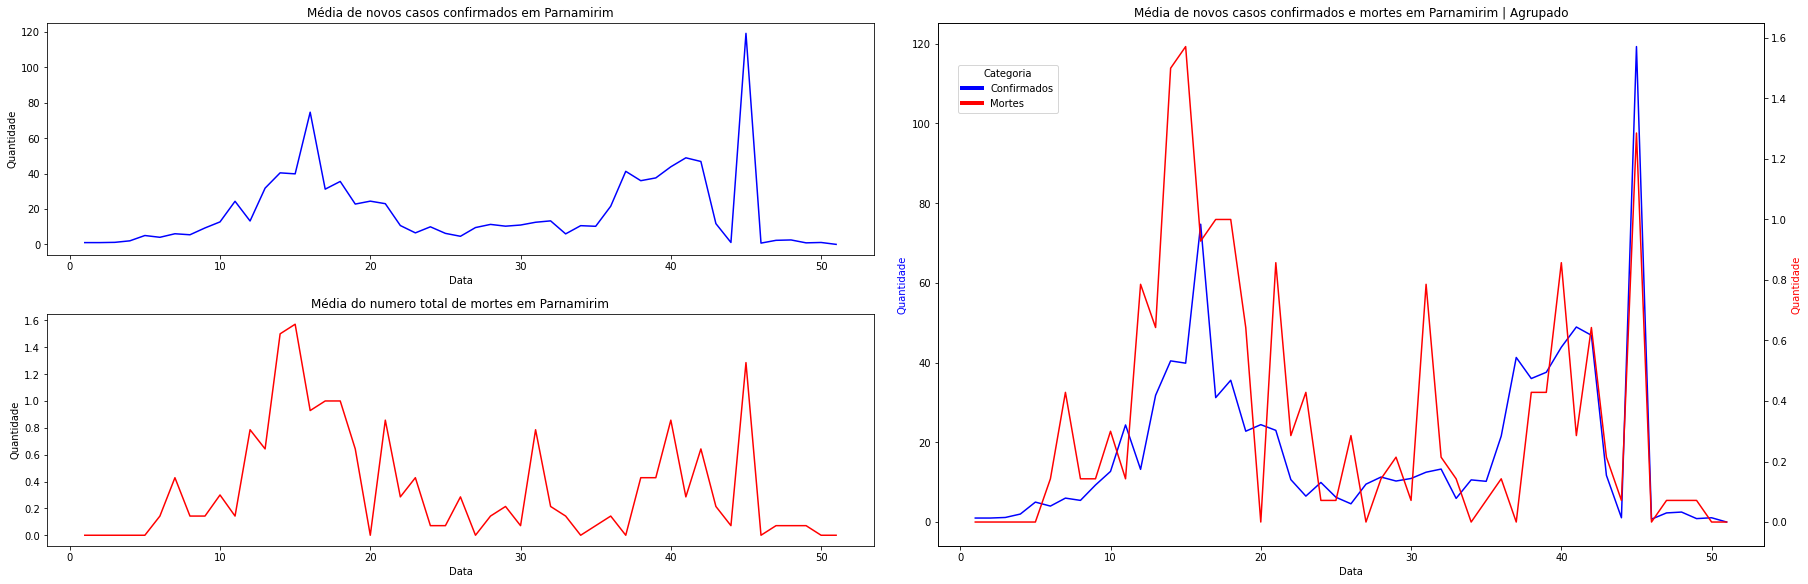

In [13]:
# Choosing taget data
mask = tempDf.variable == 'new_confirmed'
# Plot
titles = [f'Média de novos casos confirmados em {cidade}', f'Média de novos casos confirmados e mortes em {cidade} | Agrupado', f'Média do numero total de mortes em {cidade}']
plotAll(tempDf, mask, titles, x='week', y='value')

> **6. Pegue o último valor de casos confirmados por cada 100.000 habitantes para todas as cidades brasileiras e mostre a distribuição desses valores (algum tipo de histograma).**

*Note que tem que ficar só com as linhas que tem 'city' como 'place_type'. Onde cai seu município de interesse dentro dessa distribuição?*

In [14]:
# Filtering cities
mask = dataRaw.place_type == 'city'
# Selecting last value for each city
tempDf = pd.DataFrame(dataRaw[mask].groupby(['city', 'state']).last_available_confirmed_per_100k_inhabitants.nth(-1)).reset_index()
tempDf.head()

,city,state,last_available_confirmed_per_100k_inhabitants
0,Abadia de Goiás,GO,10058.04867
1,Abadia dos Dourados,MG,2740.50814
2,Abadiânia,GO,1119.20239
3,Abaetetuba,PA,3637.16369
4,Abaeté,MG,2000.00000


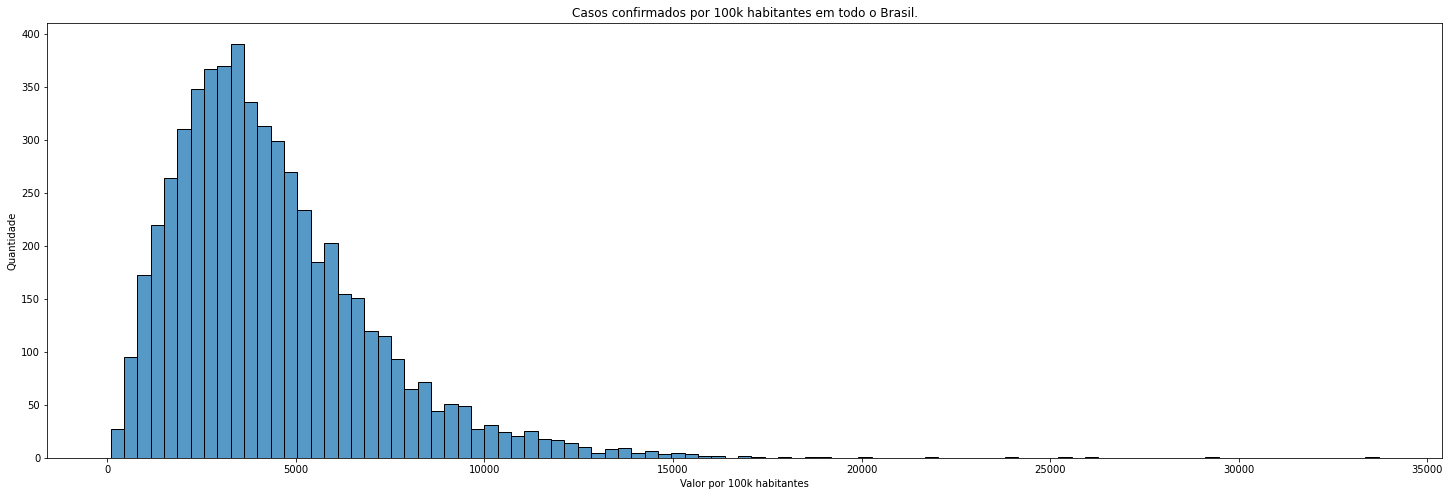

In [15]:
# Plot all cities
fig, ax = plt.subplots(figsize=(25,8))
sns.histplot(data=tempDf, x='last_available_confirmed_per_100k_inhabitants', ax=ax)
# Aesthetics
ax.set_xlabel('Valor por 100k habitantes')
ax.set_ylabel('Quantidade')
ax.set_title("Casos confirmados por 100k habitantes em todo o Brasil.")

plt.show()

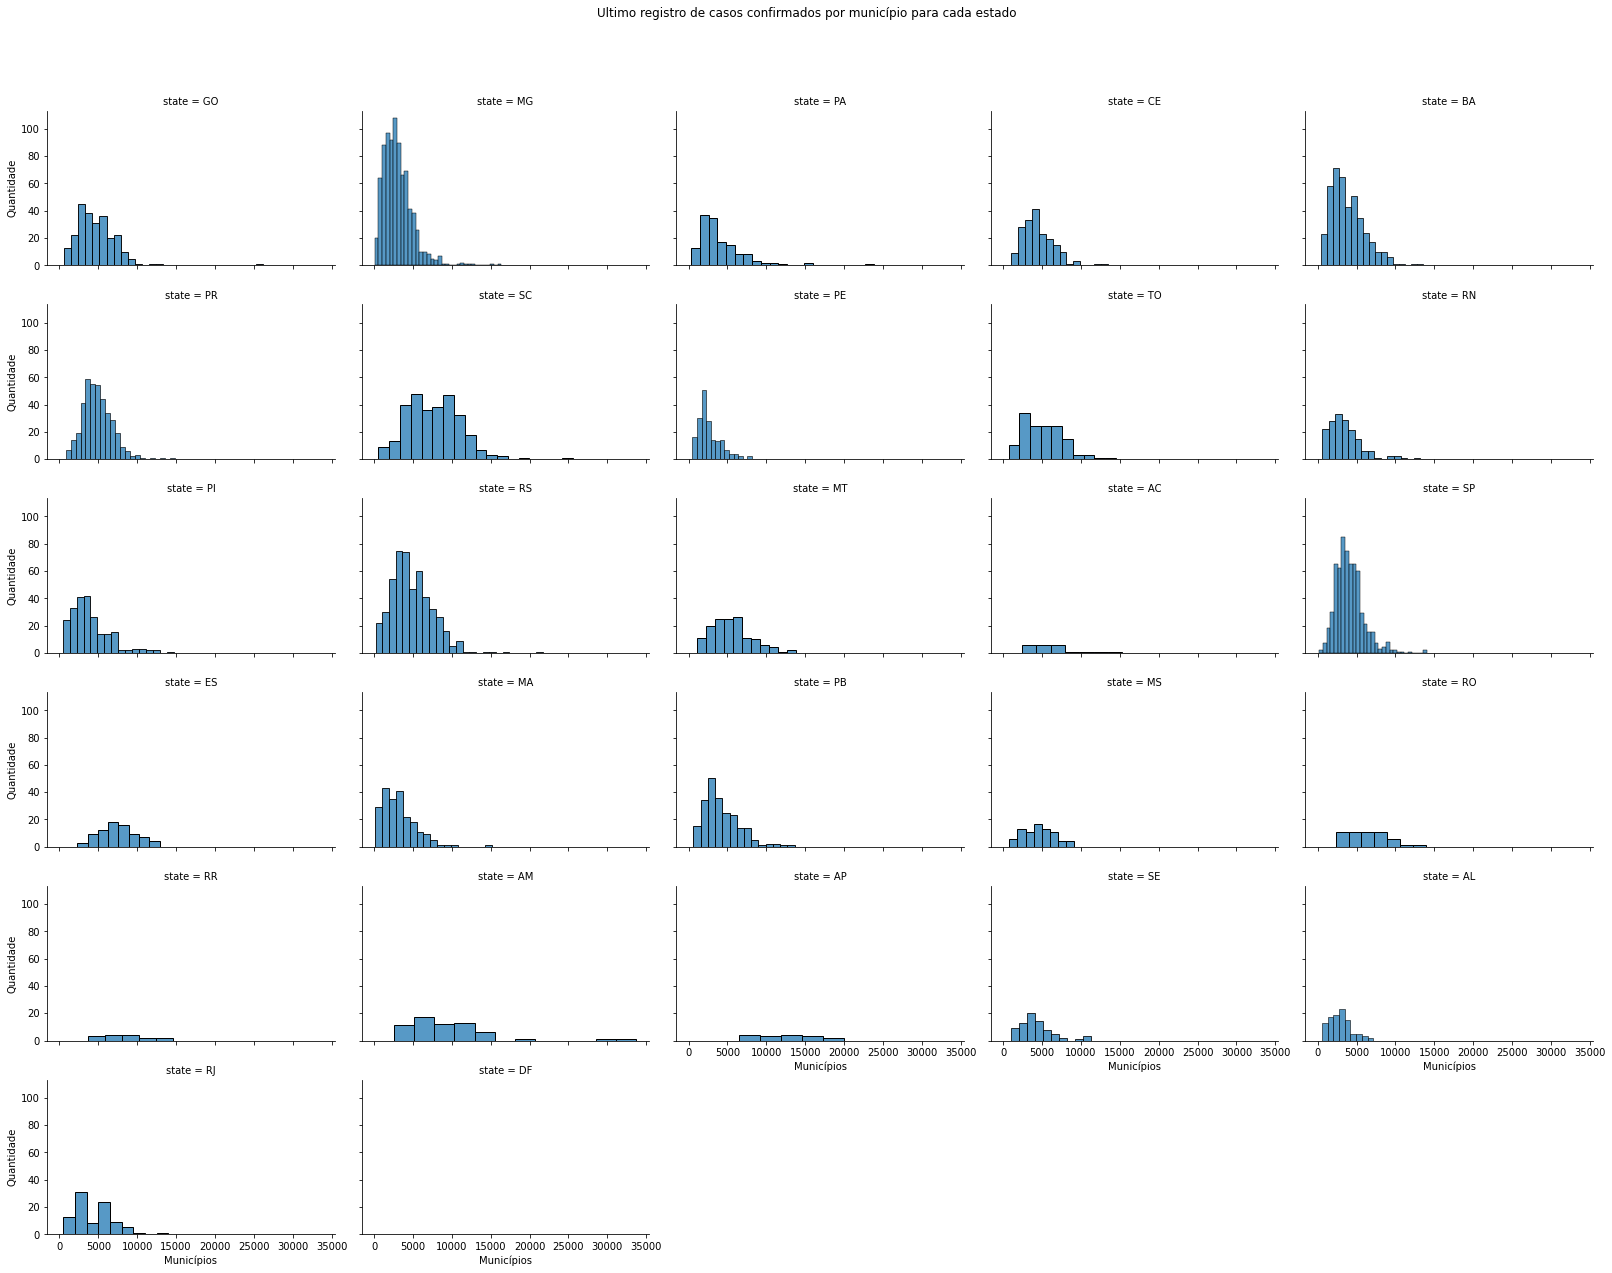

In [16]:
# Plotting for all states
grid = sns.FacetGrid(data=tempDf, col='state', col_wrap=5, height=3, aspect=1.5)#, sharey=False)
grid.map(sns.histplot, 'last_available_confirmed_per_100k_inhabitants')
# Aesthetics
grid.fig.suptitle("Ultimo registro de casos confirmados por município para cada estado")
grid.set_axis_labels(x_var='Municípios', y_var='Quantidade')
grid.fig.subplots_adjust(top=0.9)